In [102]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [103]:
import numpy as np
import pandas as pd

In [104]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [105]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [106]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [107]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [108]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [109]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

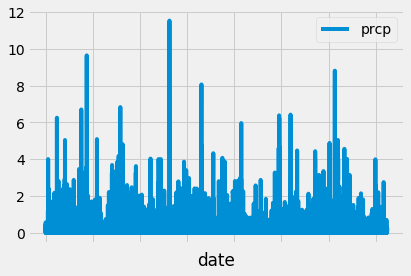

In [111]:
#  Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitationdatalastyear = session.query(Measurement.prcp,Measurement.date).\
 filter(Measurement.date > '2016-08-22').all()
precipitationdatalastyear
# df = pd.DataFrame(precipitationdatalastyear, columns = ['prcp', 'date'])
# df.plot.bar()
# plt.show()
#  Calculate the date 1 year ago from the last data point in the database
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#  Perform a query to retrieve the data and precipitation scores
precipitationdata = session.query(Measurement.prcp,Measurement.date).all()
precipitationdata
#  Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precipitationdata, columns =['prcp', 'date'])
df2 = df.sort_values(by=['date'], inplace=True, ascending=False)
#  Sort the dataframe by date
df3 = df.set_index('date', drop = False)
#  Use Pandas Plotting with Matplotlib to plot the data
df4 = df3.dropna()
df4.plot()
plt.show()

![precipitation](Images/precipitation.png)

In [112]:
# Use Pandas to calculate the summary statistics for the precipitation data
df4.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [113]:
# Design a query to show how many stations are available in this dataset?
    # inspector = inspect(engine)
    # inspector.get_table_names()
    # station = session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()
    # df5=pd.DataFrame(station, columns = ['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
    # df5
    # columns = inspector.get_columns('Measurement')
    # for c in columns:
    #     print(c['name'], c["type"])
    # engine.execute('SELECT * FROM Station LIMIT 5').fetchall()
totalstations = session.query(Station).count()
totalstations

9

In [114]:
# What are the most active stations? (i.e. what stations have the most rows)?
# columns = inspector.get_columns('Measurement')
# for c in columns:
#     print(c['name'], c["type"])
measurement = session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).all()
df6=pd.DataFrame(measurement, columns = ['id', 'station', 'date', 'prcp', 'tobs'])
# activestation = session.query(Measurement.station).all()
# activestation
# List the stations and the counts in descending order.
df6.station.value_counts()
# stationdescend = session.query(Station.station,Station.id).order_by(Station.station.desc()).all()
# stationdescend
# IDdescend = session.query(Station.station,Station.id).order_by(Station.id.desc()).all()
# IDdescend

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [115]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
temps = session.query(*sel).\
filter(Measurement.station == 'USC00519281').all()
temps


[(54.0, 71.66378066378067, 85.0)]

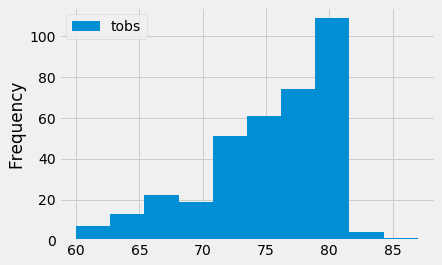

In [116]:
# Choose the station with the highest number of temperature observations.
sel = [Measurement.station, func.max(Measurement.tobs)]
temperature = session.query(*sel).\
order_by(Measurement.station.desc()).first()
temperature
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lasttemperature = session.query(Measurement.tobs).\
filter(Measurement.date > '2016-08-22').filter(Measurement.station == 'USC00519397').all()
lasttemperature
tempdf = pd.DataFrame(lasttemperature)
tempdf.plot.hist()
bins=12
plt.show()